# PROBLEM STATEMENT

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [Train Data Import & Cleaning](#Train-Data-Import-&-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)

# 1. Train Data Import & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#to display all the columns in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

%matplotlib inline

In [2]:
train_df = pd.read_csv("../datasets/train.csv")

In [3]:
print(train_df.shape)

(2051, 81)


In [4]:
pd.set_option('display.max_columns', None)
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

> To take note Columns that the entries which non-null is lesser than 2051.

In [6]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [7]:
na_features =[x for x in train_df.columns if train_df[x].isnull().sum()>1]
for x in na_features:
    print(x,np.round(train_df[x].isnull().mean(),4),' %')

Lot Frontage 0.1609  %
Alley 0.9317  %
Mas Vnr Type 0.0107  %
Mas Vnr Area 0.0107  %
Bsmt Qual 0.0268  %
Bsmt Cond 0.0268  %
Bsmt Exposure 0.0283  %
BsmtFin Type 1 0.0268  %
BsmtFin Type 2 0.0273  %
Bsmt Full Bath 0.001  %
Bsmt Half Bath 0.001  %
Fireplace Qu 0.4876  %
Garage Type 0.0551  %
Garage Yr Blt 0.0556  %
Garage Finish 0.0556  %
Garage Qual 0.0556  %
Garage Cond 0.0556  %
Pool QC 0.9956  %
Fence 0.805  %
Misc Feature 0.9683  %


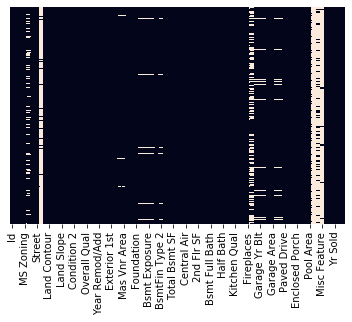

In [8]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False);

In [9]:
# https://www.gimme-shelter.com/frontage-50043/
# the lot frontage might be a main contributor to the price difference so considered to change null to median of same subclass and lot shape

train_df['Lot Frontage'] = train_df.groupby(['MS SubClass','Lot Shape'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [10]:
# check if there is null remain in the Lot Frontage columns
train_df.loc[train_df['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
430,1848,533223050,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,239.0,Unf,0.0,312.0,551.0,GasA,Ex,Y,SBrkr,551,551,0,1102,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,Unf,2.0,480.0,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,148800
1515,2731,905351045,150,RL,NaN,1700,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,Twnhs,1.5Fin,7,5,1980,1981,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,397.0,Unf,0.0,33.0,430.0,GasA,TA,Y,SBrkr,880,680,140,1700,1.0,0.0,2,1,2,1,Gd,7,Typ,0,NaN,Basment,1980.0,Fin,1.0,450.0,Gd,TA,Y,188,36,0,0,200,0,NaN,NaN,NaN,0,4,2006,WD,148400
1721,1429,906424010,80,RL,NaN,11454,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,SLvl,8,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,302.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,770.0,Unf,0.0,631.0,1401.0,GasA,Ex,Y,SBrkr,1511,0,0,1511,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1995.0,Fin,3.0,811.0,TA,TA,Y,168,42,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,225000
1735,1928,535181030,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,6,3,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,1237.0,Unf,0.0,420.0,1657.0,GasA,Gd,Y,SBrkr,1657,0,0,1657,0.0,1.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1970.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,147,0,NaN,NaN,NaN,0,3,2007,WD,163500


In [11]:
train_df['Lot Frontage'].fillna(train_df['Lot Frontage'].median(),inplace=True)

In [12]:
train_df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [13]:
train_df['Alley'].fillna('Na',inplace=True)

In [14]:
train_df['Alley'].isnull().sum()

0

In [15]:
train_df['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [16]:
train_df['Mas Vnr Type'].fillna('None',inplace=True)

In [17]:
train_df['Mas Vnr Area'].fillna(0.0,inplace=True)

In [18]:
train_df.loc[(train_df['Mas Vnr Area']>0) & (train_df['Mas Vnr Type']=='None')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
765,1862,533352075,90,RL,73.0,18890,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,190000
810,2529,534129230,60,RL,80.0,10400,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1790,1.0,0.0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,165150
1148,1914,535106140,20,RL,70.0,10150,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,114500
1684,2004,902427140,20,RM,52.0,8626,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,104500
1832,364,527166010,60,RL,74.0,10762,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,1983,0.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,225000


In [19]:
train_df.iloc[[765],27] = train_df.iloc[[765],27].replace(1.0,0.0)
train_df.iloc[[810],27] = train_df.iloc[[810],27].replace(1.0,0.0)
train_df.iloc[[1148],27] = train_df.iloc[[1148],27].replace(1.0,0.0)
train_df.iloc[[1684],27] = train_df.iloc[[1684],27].replace(1.0,0.0)
train_df.iloc[[1832],27] = train_df.iloc[[1832],27].replace(1.0,0.0)

In [20]:
train_df.loc[(train_df['Bsmt Exposure'].isnull()) & (train_df['Bsmt Qual'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,Na,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [21]:
train_df.iloc[[1456],33] = train_df.iloc[[1456],33].fillna('No')
train_df.iloc[[1547],33] = train_df.iloc[[1547],33].fillna('No')
train_df.iloc[[1997],33] = train_df.iloc[[1997],33].fillna('No')

In [22]:
train_df.loc[(train_df['Bsmt Exposure'].isnull()) & (train_df['Bsmt Qual'].isnull())].shape

(55, 81)

In [23]:
train_df['Bsmt Exposure'].fillna('NA',inplace=True)

In [24]:
train_df.replace({'Bsmt Exposure':{'NA':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

In [25]:
train_df.loc[(train_df['BsmtFin Type 1'].isnull()) & (train_df['Bsmt Qual'].isnull())].shape

(55, 81)

In [26]:
train_df['BsmtFin Type 1'].fillna('NA',inplace=True)

In [27]:
train_df.loc[train_df['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [28]:
train_df['BsmtFin SF 1'].fillna(0.0,inplace=True)

In [29]:
train_df.loc[(train_df['BsmtFin Type 2'].isnull()) & (train_df['Bsmt Qual'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,2,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


In [30]:
train_df.groupby(['Bsmt Qual','BsmtFin Type 1'])['BsmtFin Type 2'].apply(stats.mode)

Bsmt Qual  BsmtFin Type 1
Ex         ALQ                 ([Unf], [3])
           GLQ               ([Unf], [139])
           LwQ                 ([ALQ], [1])
           Rec                 ([GLQ], [1])
           Unf                ([Unf], [37])
Fa         ALQ                 ([Unf], [4])
           BLQ                 ([Unf], [3])
           LwQ                 ([Unf], [9])
           Rec                 ([Unf], [4])
           Unf                ([Unf], [38])
Gd         ALQ                ([Unf], [84])
           BLQ                ([Unf], [20])
           GLQ               ([Unf], [379])
           LwQ                 ([GLQ], [8])
           Rec                ([Unf], [20])
           Unf               ([Unf], [262])
Po         Unf                 ([Unf], [1])
TA         ALQ               ([Unf], [135])
           BLQ               ([Unf], [120])
           GLQ                ([Unf], [51])
           LwQ                ([Unf], [48])
           Rec               ([Unf], [120])
      

In [31]:
train_df.iloc[[1147],[36]] = train_df.iloc[[1147],[36]].fillna('unf')
train_df['BsmtFin Type 2'].fillna('NA',inplace=True)

In [32]:
train_df.loc[train_df['BsmtFin SF 2'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,0.0,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [33]:
train_df['BsmtFin SF 2'].fillna(0.0,inplace=True)

In [34]:
train_df.loc[train_df['Bsmt Unf SF'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,0.0,NA,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [35]:
train_df['Bsmt Unf SF'].fillna(0.0,inplace=True)

In [36]:
train_df.loc[train_df['Total Bsmt SF'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,0.0,NA,0.0,0.0,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [37]:
train_df['Total Bsmt SF'].fillna(0.0,inplace=True)

In [38]:
train_df.loc[train_df['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [39]:
train_df['Bsmt Full Bath'].fillna(0.0,inplace=True)

In [40]:
train_df.loc[train_df['Bsmt Half Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [41]:
train_df['Bsmt Half Bath'].fillna(0.0,inplace=True)

In [42]:
train_df.loc[train_df['Bsmt Cond'].isnull()].shape

(55, 81)

In [43]:
train_df['Bsmt Cond'].fillna('NA',inplace=True)

In [44]:
train_df.replace({'Bsmt Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [45]:
train_df['Bsmt Qual'].fillna('NA',inplace=True)

In [46]:
train_df['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object)

In [47]:
train_df.replace({'Bsmt Qual':{'NA':1,'Po':2,'Fa':3,'RA':4,'Gd':5,'Ex':6}},inplace=True)

In [48]:
train_df.loc[(train_df['Fireplace Qu'].isnull()) & (train_df['Fireplaces'] == 0)].shape

(1000, 81)

In [49]:
train_df['Fireplace Qu'].fillna('NA',inplace=True)

In [50]:
train_df['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [51]:
train_df.replace({'Bsmt Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [52]:
train_df.loc[(train_df['Garage Type'].notnull()) & (train_df['Garage Qual'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,5,4,2,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [53]:
train_df.iloc[[1712],[59]] = train_df.iloc[[1712],[59]].replace('Detchd','NA') 

In [54]:
train_df.iloc[[1712] ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,5,4,2,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,NA,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [55]:
train_df['Garage Type'].isnull().sum()

113

In [56]:
train_df['Garage Type'].fillna('NA',inplace=True)

In [57]:
train_df['Garage Yr Blt'].fillna(0.0,inplace=True)
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].astype(float)

In [58]:
train_df['Garage Finish'].fillna('NA',inplace=True)

In [59]:
train_df['Garage Cars'].fillna('NA',inplace=True)

In [60]:
train_df['Garage Area'].fillna(0.0,inplace=True)
train_df['Garage Area'] = train_df['Garage Area'].astype(float)

In [61]:
train_df['Garage Qual'].fillna('NA',inplace=True)

In [62]:
train_df['Garage Qual'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object)

In [63]:
train_df.replace({'Garage Qual':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [64]:
train_df['Garage Cond'].fillna('NA',inplace=True)

In [65]:
train_df['Garage Cond'].unique()

array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object)

In [66]:
train_df.replace({'Garage Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [67]:
train_df['Fence'].fillna('NA',inplace=True)

In [68]:
train_df['Pool QC'].fillna('NA',inplace=True)

In [69]:
train_df['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [70]:
train_df.replace({'Pool QC':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [71]:
#cross checking misc feature & misc value
train_df.loc[(train_df['Misc Feature'].isnull()) & (train_df['Misc Val'] != 0)].shape

(0, 81)

In [72]:
train_df['Misc Feature'].fillna('NA',inplace=True)

In [73]:
train_df['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [74]:
train_df.replace({'Exter Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [75]:
train_df['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [76]:
train_df.replace({'Exter Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [77]:
train_df['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [78]:
train_df.replace({'Heating QC':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [79]:
train_df['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [80]:
train_df.replace({'Kitchen Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [81]:
train_df['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [82]:
#simplify the MS Zoning category
train_df.replace({'MS Zoning':{'C (all)': 'C', 'A (agr)': 'A', 'I (all)': 'I'}},inplace=True)

In [83]:
train_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

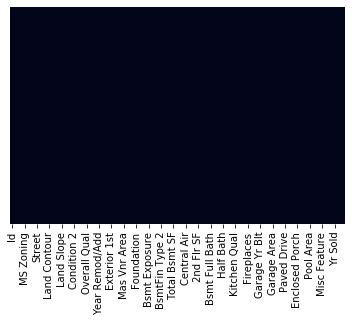

In [84]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False);

In [85]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

SalePrice         0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Year Built        0
Overall Cond      0
Overall Qual      0
Lot Shape         0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
dtype: int64

In [86]:
# export file
train_df.to_csv('../datasets/train_clean.csv', index=False)